In [1]:
import csv
import random
DataPath = './dataset/abcnews-date-text.csv'
class Data:
    Dates = []
    Titles = []
    size = 0
    pass

# load dates and titles from the csv file
def LoadData(path):
    with open(path, 'r') as f:
        data = Data()
        reader = csv.reader(f)
        for row in reader:
            if(reader.line_num > 1):
                data.Dates.append(row[0])
                data.Titles.append(row[1])
                data.size += 1
    return data

In [2]:
STOPWORDS = ["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along",
             "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any",
             "anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because",
             "become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides",
             "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could",
             "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either",
             "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere",
             "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty",
             "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence",
             "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however",
             "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
             "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover",
             "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next",
             "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once",
             "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part",
             "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several",
             "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something",
             "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them",
             "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they",
             "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together",
             "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via",
             "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby",
             "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose",
             "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]

In [ ]:
data = LoadData(DataPath)
print(data.Dates[-1])
print(data.Titles[-1])

20171231
who is george papadopoulos the former trump campaign aide


In [ ]:
from collections import Counter
cnt = Counter()
num_of_words = Counter()
word_count = []
for title in data.Titles:
    words = title.split(" ")
    num = len(words)
    word_count.append(num)
    for word in words:
        if(word not in STOPWORDS):
            cnt[word] += 1
len(cnt)

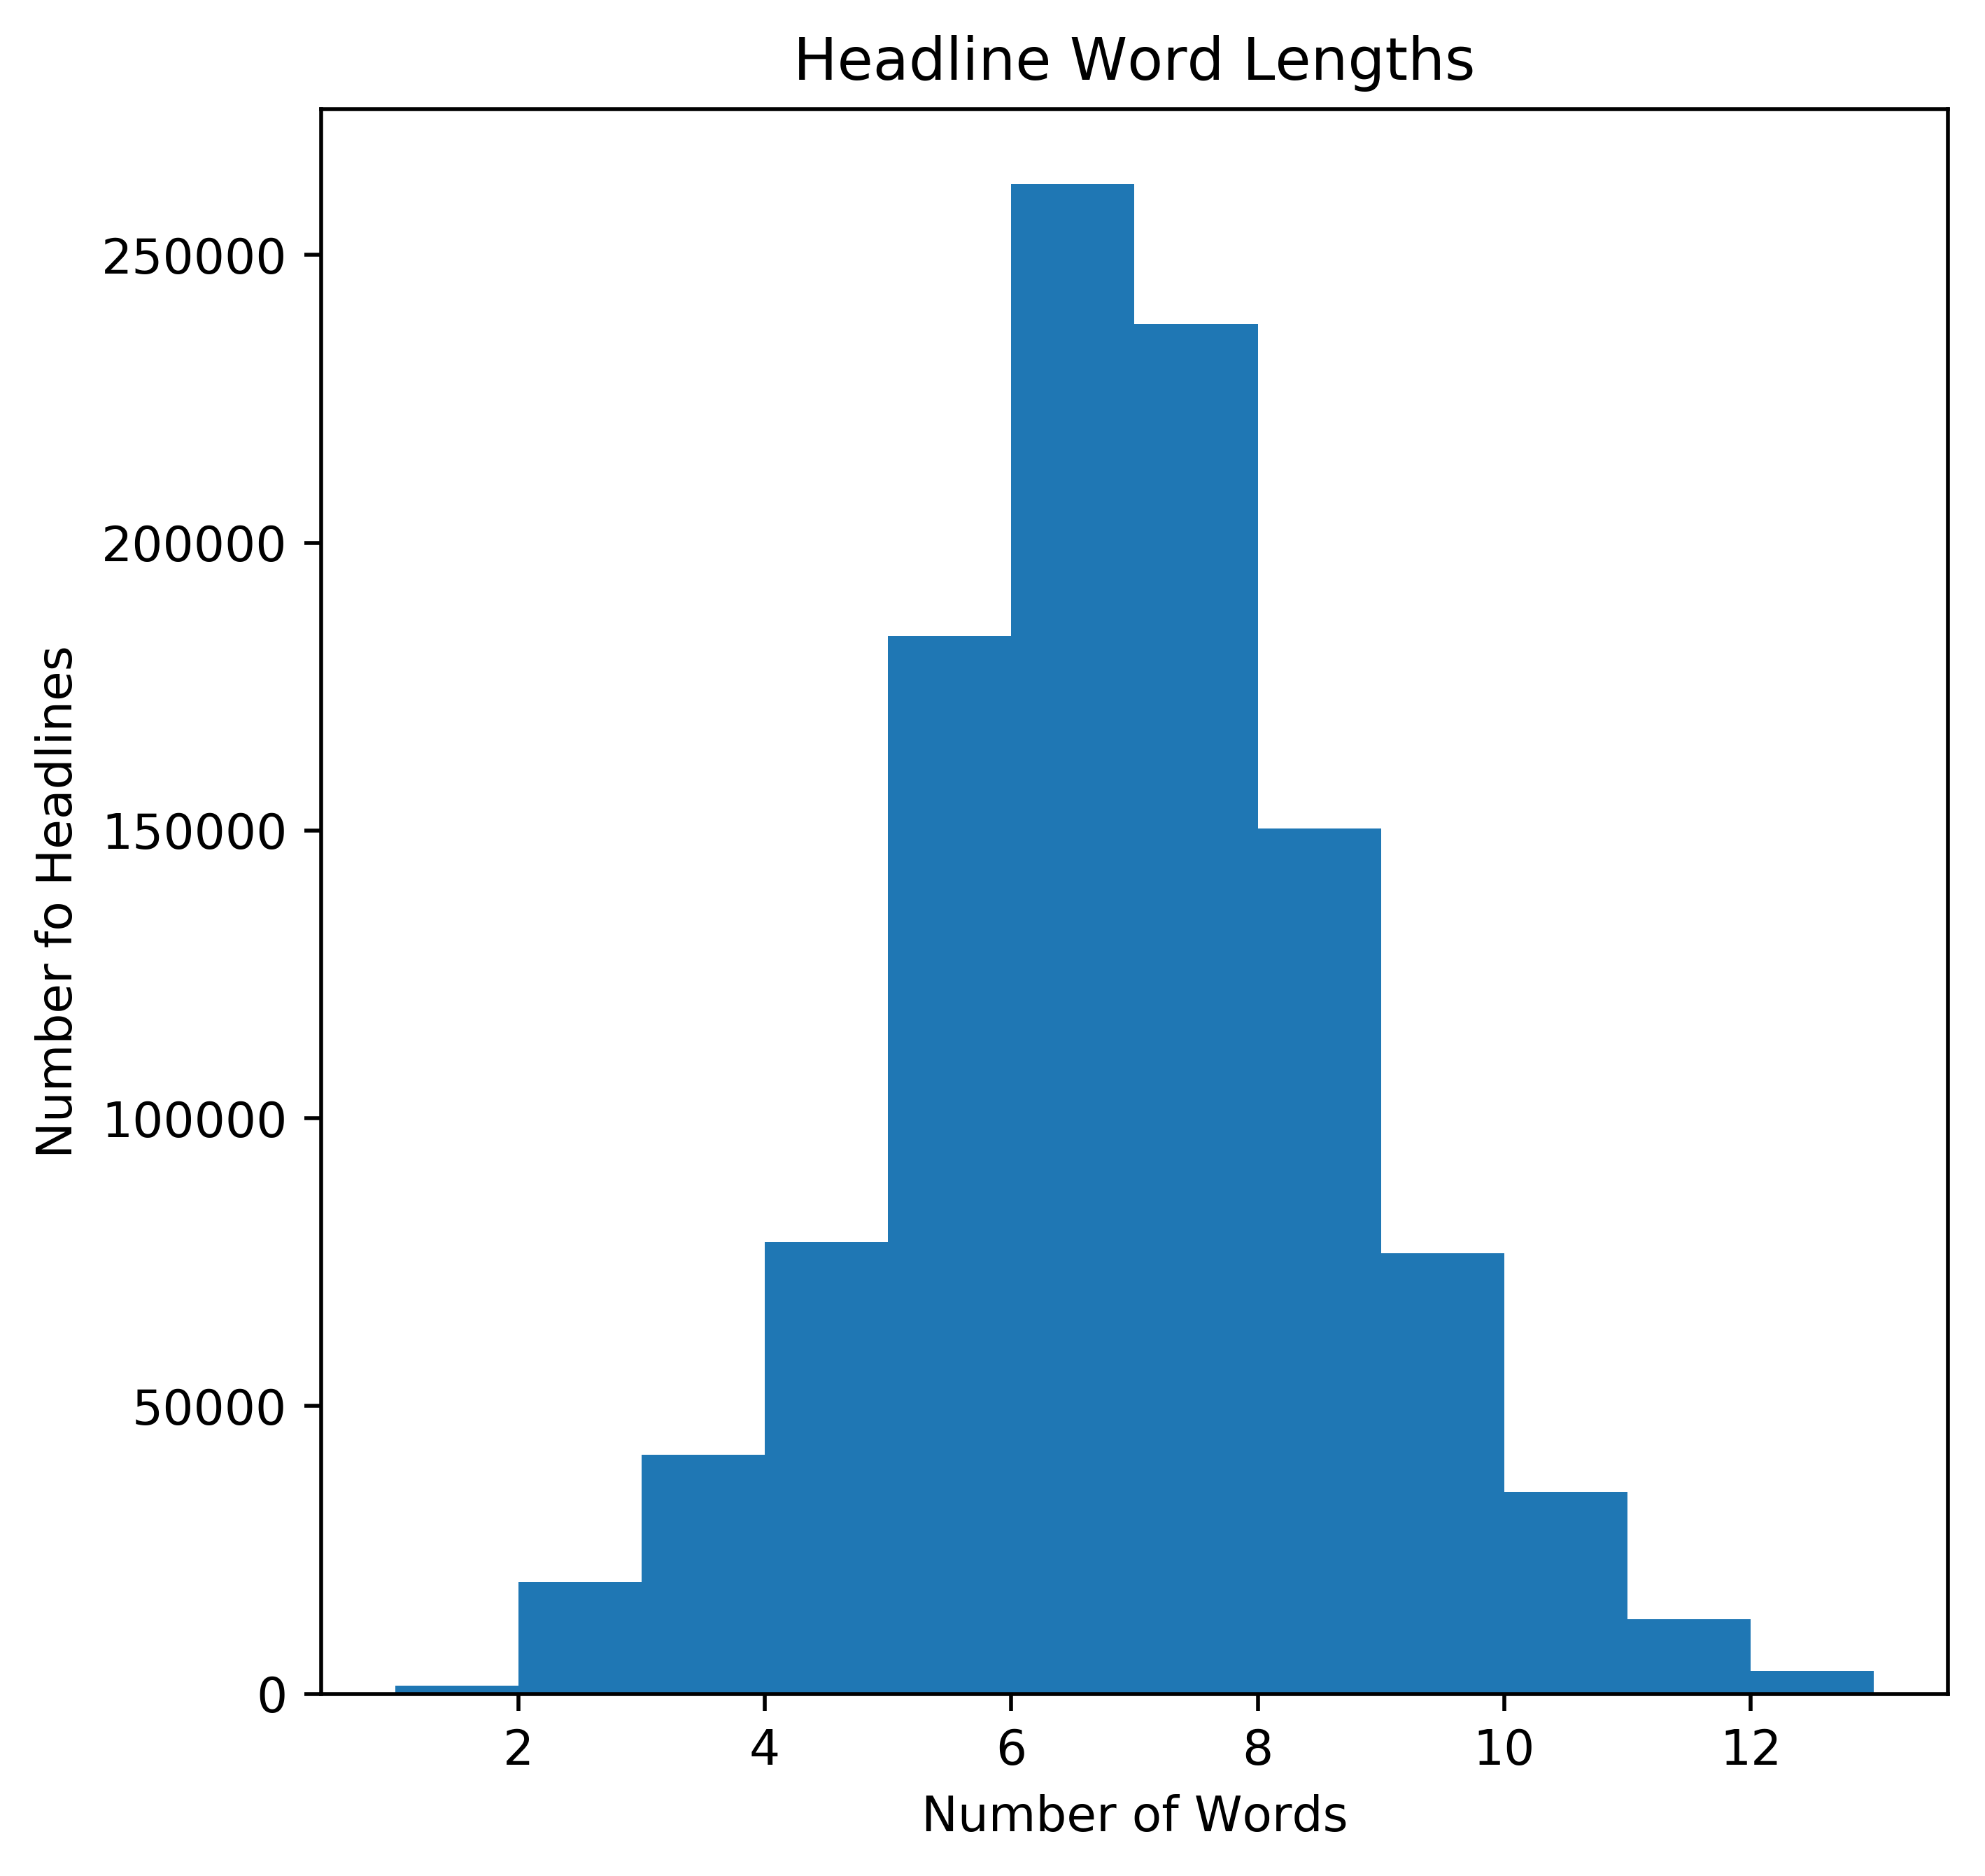

In [7]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
b = num_of_words.most_common(15)

fig, ax = plt.subplots(figsize=(6,6), dpi=500)
ax.hist(word_count, bins=range(1,14))
# y = mlab.normpdf( np.linspace(0,14,50), np.mean(word_count), np.std(word_count))
# l = ax.plot(np.linspace(0,14,50), y, 'r--', linewidth=1)
ax.set_title('Headline Word Lengths')
ax.set_xlabel('Number of Words')
ax.set_ylabel('Number fo Headlines')
plt.show()

In [8]:
print(sum(cnt.values()))
a = cnt.most_common()
for i in range(1, 5):
    print(a[i][0], a[i][1])

5642071
new 29084
man 27975
says 20000
govt 16921


In [9]:
len(a)

107879

In [10]:
new_a = []
for item in a:
    if item[0] not in STOPWORDS:
        new_a.append(item)

In [11]:
len(new_a)

107879

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english', max_features=50000)

small_text_sample = random.sample(data.Titles,5000)

print('Headline before vectorization: ', small_text_sample[2])

term_matrix = count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n', term_matrix[2])

Headline before vectorization:  labor senator sam dastyari confirms senate resignation
Headline after vectorization: 
   (0, 6332)	1
  (0, 6805)	1
  (0, 1772)	1
  (0, 2102)	1
  (0, 6630)	1
  (0, 6806)	1
  (0, 4296)	1


In [13]:
for i in range(10):
    print(small_text_sample[i])

blues struggling at the scg
forum paves way for png trade boost
labor senator sam dastyari confirms senate resignation
states and territories cry foul over govt water
cowboy mason ready to rip in
murray comes down hard on cowboys commitment
lambie describes her ideal man as well hung on radio
riverland grape yields lower than expected
mark sandery son children unfairly caught up in bikies war
12m australians want work but not considered


In [14]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10

lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(term_matrix)


In [15]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap_text = np.array([
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]
colormap_textp = colormap_text[:n_topics]

In [16]:
print(np.argmax(lda_topic_matrix[2]))
print(lda_topic_matrix[2])

5
[ 0.0125  0.0125  0.0125  0.0125  0.0125  0.8875  0.0125  0.0125  0.0125
  0.0125]


In [17]:
lda_keys = [np.argmax(title) for title in lda_topic_matrix]

In [18]:
lda_keys[5]

4

In [19]:
from scipy.sparse import csr_matrix
top_n_words_each_topic = []
print(top_n_words_each_topic)
for i in range(n_topics):
    words_of_this_topic = csr_matrix([0]*term_matrix[i].shape[1])
    for j in range(len(lda_keys)):
        if lda_keys[j] == i:
            words_of_this_topic = words_of_this_topic + term_matrix[j]
    top_n_words_each_topic.append(words_of_this_topic)

[]


In [20]:
a0 = top_n_words_each_topic[0].toarray()[0]
print(np.argmax(a0), max(a0))
count_vectorizer.get_feature_names()[np.argmax(a0)]
sort_n_words_each_topic = np.argsort(-a0)

5045 22


In [21]:
for i in range(10):
    print(i+1, count_vectorizer.get_feature_names()[sort_n_words_each_topic[i]], a0[sort_n_words_each_topic[i]])

1 murder 22
2 country 21
3 missing 21
4 police 20
5 charged 19
6 hour 17
7 doctors 15
8 death 15
9 sa 15
10 election 14


In [22]:
from scipy.sparse import csr_matrix

def get_top_n_words(n, keys, term_matrix, count_vectorizer, n_topics):
    top_n_words_list = []
    top_n_words_index = []
    top_n_words_times = []
    for i in range(n_topics):
        index = [ii for ii in range(len(keys)) if keys[ii] == i]
        sum_vector = csr_matrix([np.int64(0)]*term_matrix[0].shape[1])
        for ii in index:
            sum_vector = sum_vector + term_matrix[ii]
        top_index = np.argsort(sum_vector.toarray())[0][-1:-(n+1):-1]
        top_times = np.sort(sum_vector.toarray())[0][-1:-(n+1):-1]
        top_n_words_index.append(top_index)
        top_n_words_times.append(top_times)
    for i in range(n_topics):
        top_list = []
        for j in range(len(top_n_words_index[i])):
            top_list.append(count_vectorizer.get_feature_names()[top_n_words_index[i][j]])
        top_n_words_list.append(top_list)
        
    return top_n_words_list, top_n_words_times
        
    

top_5_words_list, top_5_words_times = get_top_n_words(5, lda_keys, term_matrix, count_vectorizer, 10)


for i in range(n_topics):
    print("Topic %d" % i)
    for j in range(5):
        print(j+1, top_5_words_list[i][j], top_5_words_times[i][j])
    print()

Topic 0
1 murder 22
2 missing 21
3 country 21
4 police 20
5 charged 19

Topic 1
1 council 48
2 court 38
3 man 38
4 govt 34
5 accused 29

Topic 2
1 market 28
2 government 18
3 report 17
4 boost 17
5 coast 16

Topic 3
1 wa 27
2 urged 15
3 melbourne 15
4 fight 14
5 queensland 13

Topic 4
1 years 17
2 power 16
3 price 16
4 year 16
5 funds 15

Topic 5
1 hospital 26
2 day 22
3 crash 19
4 set 18
5 claims 16

Topic 6
1 says 37
2 man 32
3 australia 28
4 mp 21
5 woman 19

Topic 7
1 interview 53
2 new 49
3 car 20
4 killed 17
5 warning 15

Topic 8
1 qld 31
2 water 30
3 rural 26
4 national 21
5 govt 17

Topic 9
1 police 86
2 sydney 39
3 health 26
4 nsw 25
5 australian 19



In [27]:
from sklearn.manifold import TSNE

tsne_lda_model = TSNE(n_components=3, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.955s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.070163
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.015533
[t-SNE] Error after 2000 iterations: 1.038200


In [24]:
from sklearn.manifold import TSNE
tsne_lda_model_2D = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors_2D = tsne_lda_model_2D.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.019s...
[t-SNE] Computed neighbors for 5000 samples in 0.964s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.070163
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.946526
[t-SNE] Error after 2000 iterations: 1.193640


In [25]:
def get_mean_topic_vectors(lda_keys, tsne_lda_vectors):
    num_of_topics = max(lda_keys)+1
    print(num_of_topics)
    lda_mean_topic_vectors = [[0] * len(tsne_lda_vectors[0])] * num_of_topics
    print(lda_mean_topic_vectors)
    counts = [0] * num_of_topics
    for i in range(len(tsne_lda_vectors)):
        counts[lda_keys[i]] += 1
        lda_mean_topic_vectors[lda_keys[i]] = lda_mean_topic_vectors[lda_keys[i]] + tsne_lda_vectors[i]
    for i in range(len(lda_mean_topic_vectors)):
        lda_mean_topic_vectors[i] = lda_mean_topic_vectors[i] / counts[i]
    return lda_mean_topic_vectors
    


lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors_2D)
print(tsne_lda_vectors_2D[0])

10
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[-15.26010036  39.95653152]


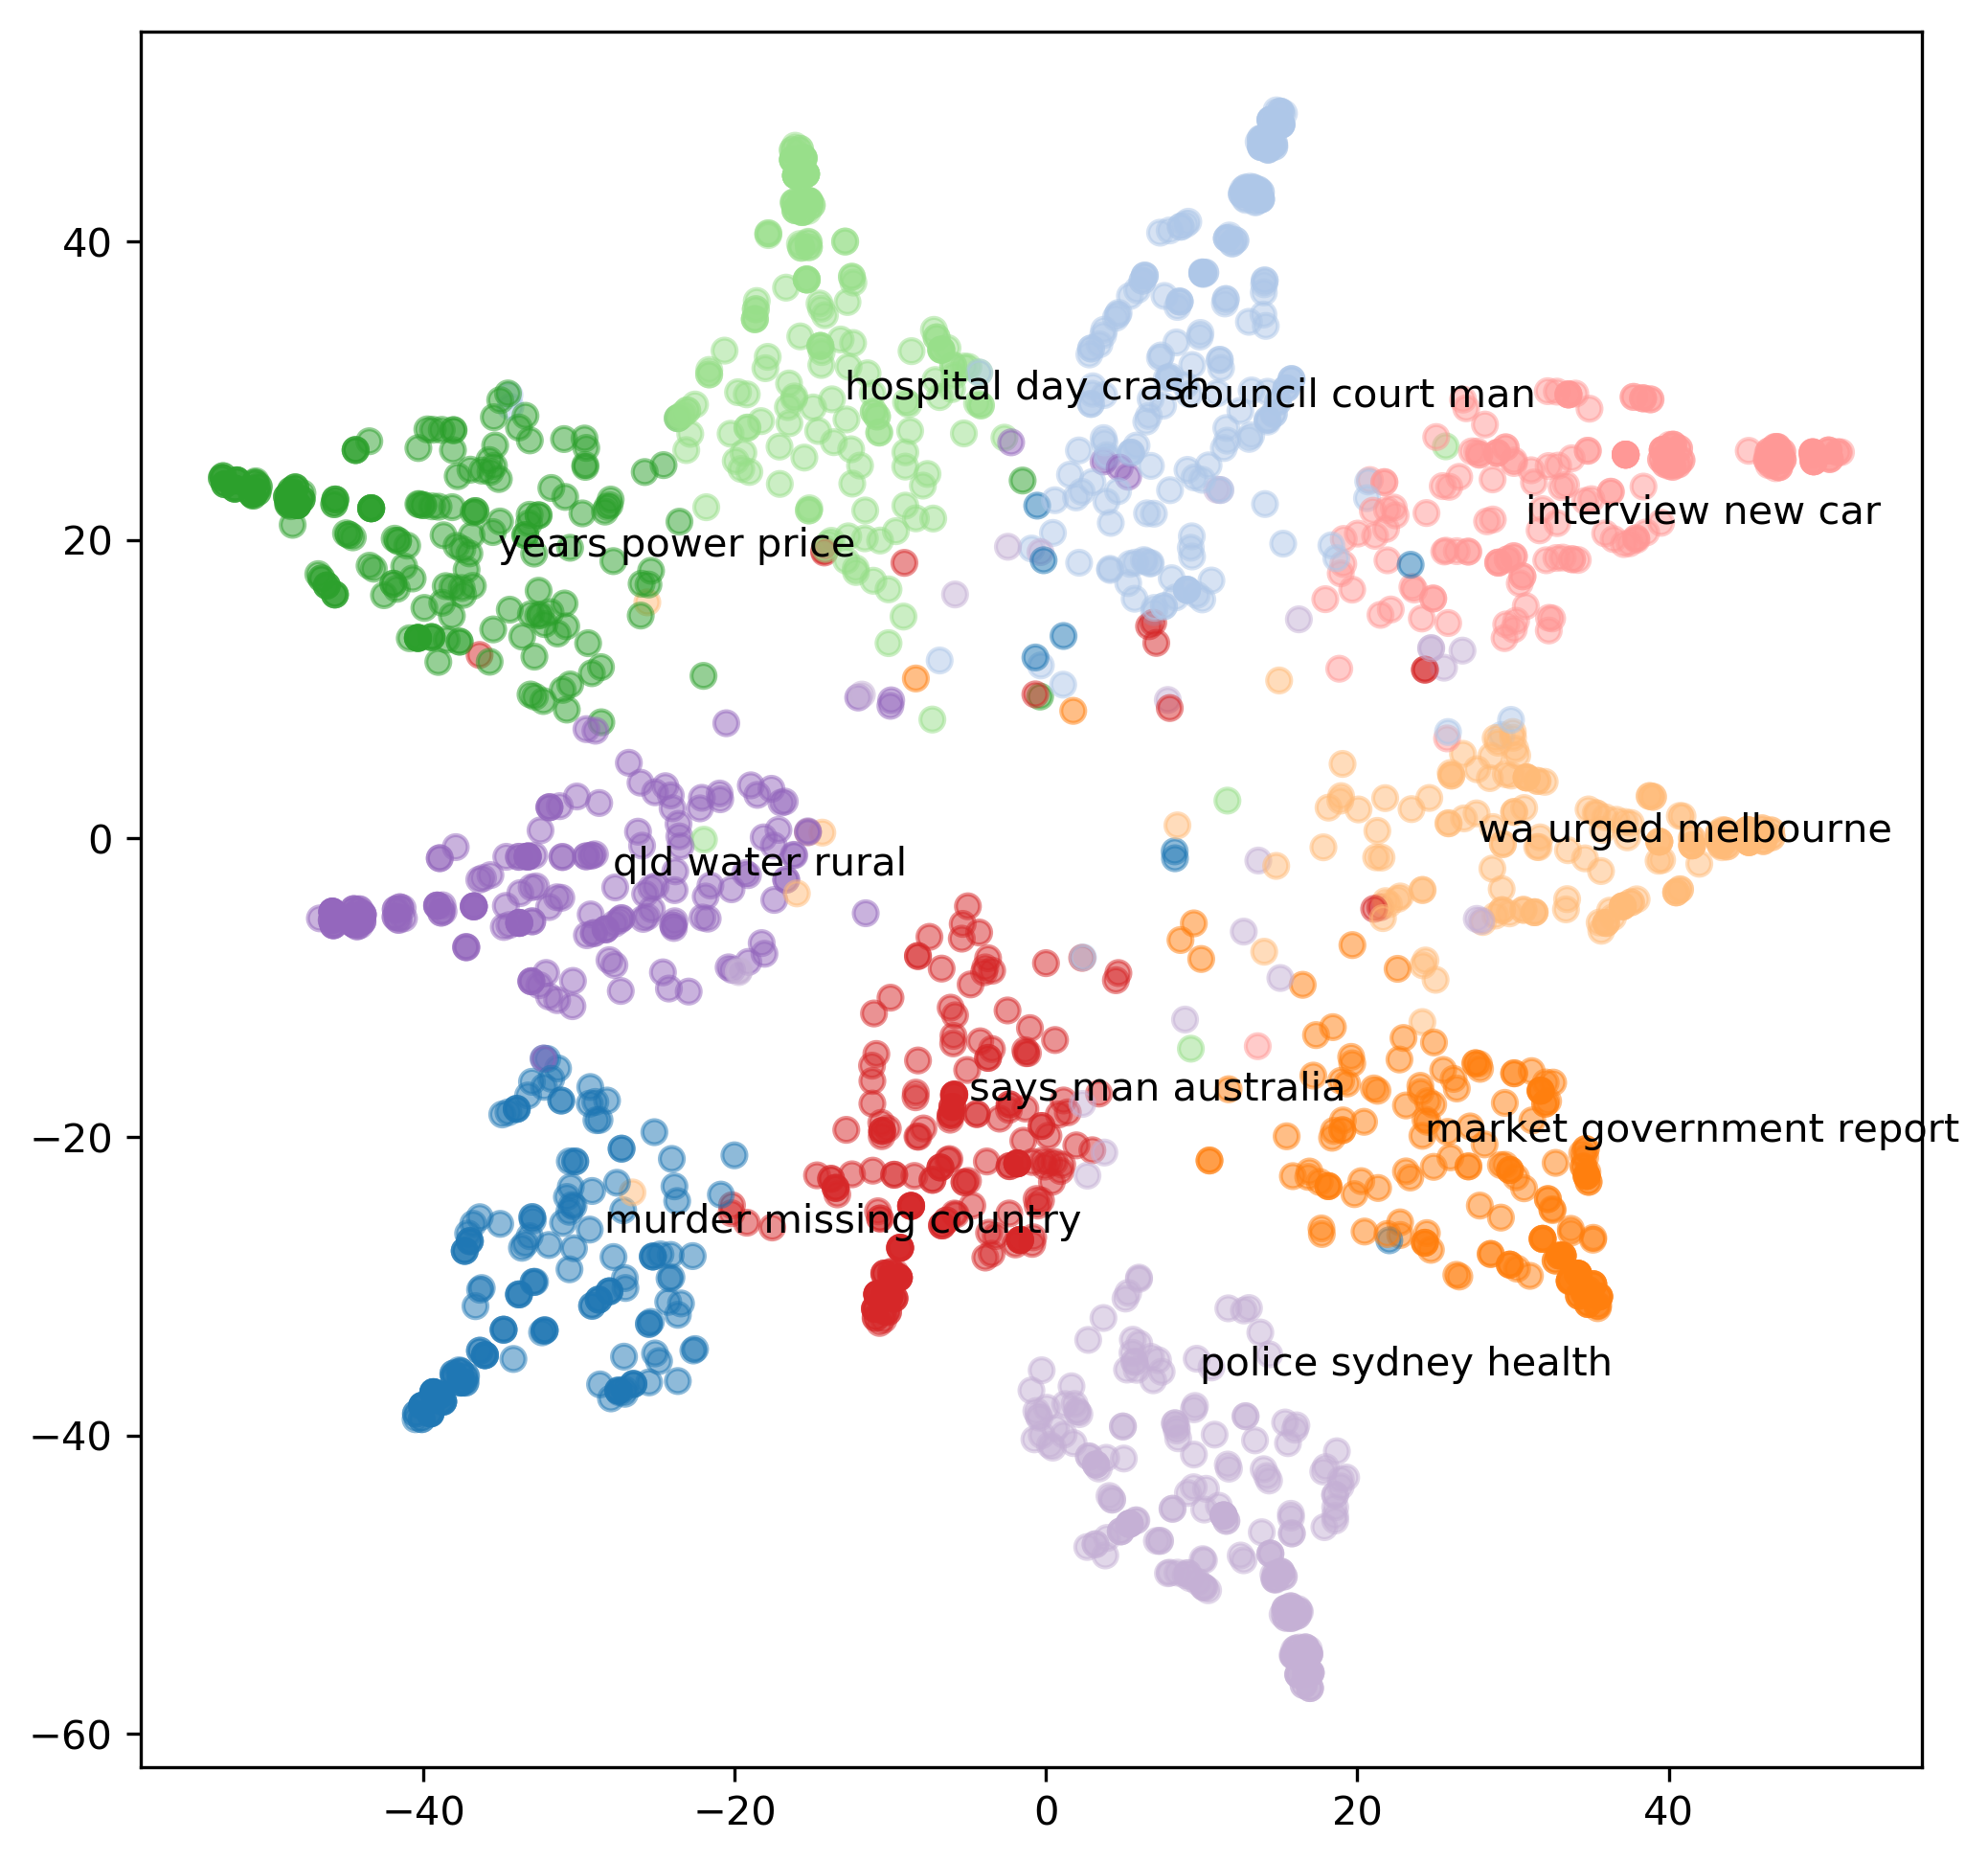

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), dpi=300) 
ax = plt.subplot(111)
ax.scatter(tsne_lda_vectors_2D[1:2000,0], tsne_lda_vectors_2D[1:2000,1], c=colormap[lda_keys[1:2000]], alpha = 0.5)
for i in range(n_topics):
    plt.text(lda_mean_topic_vectors[i][0], lda_mean_topic_vectors[i][1], 
             top_5_words_list[i][0] + ' ' + top_5_words_list[i][1] +' ' + top_5_words_list[i][2], color= "#000000")
plt.show()

In [27]:
# type(lda_mean_topic_vectors[0])

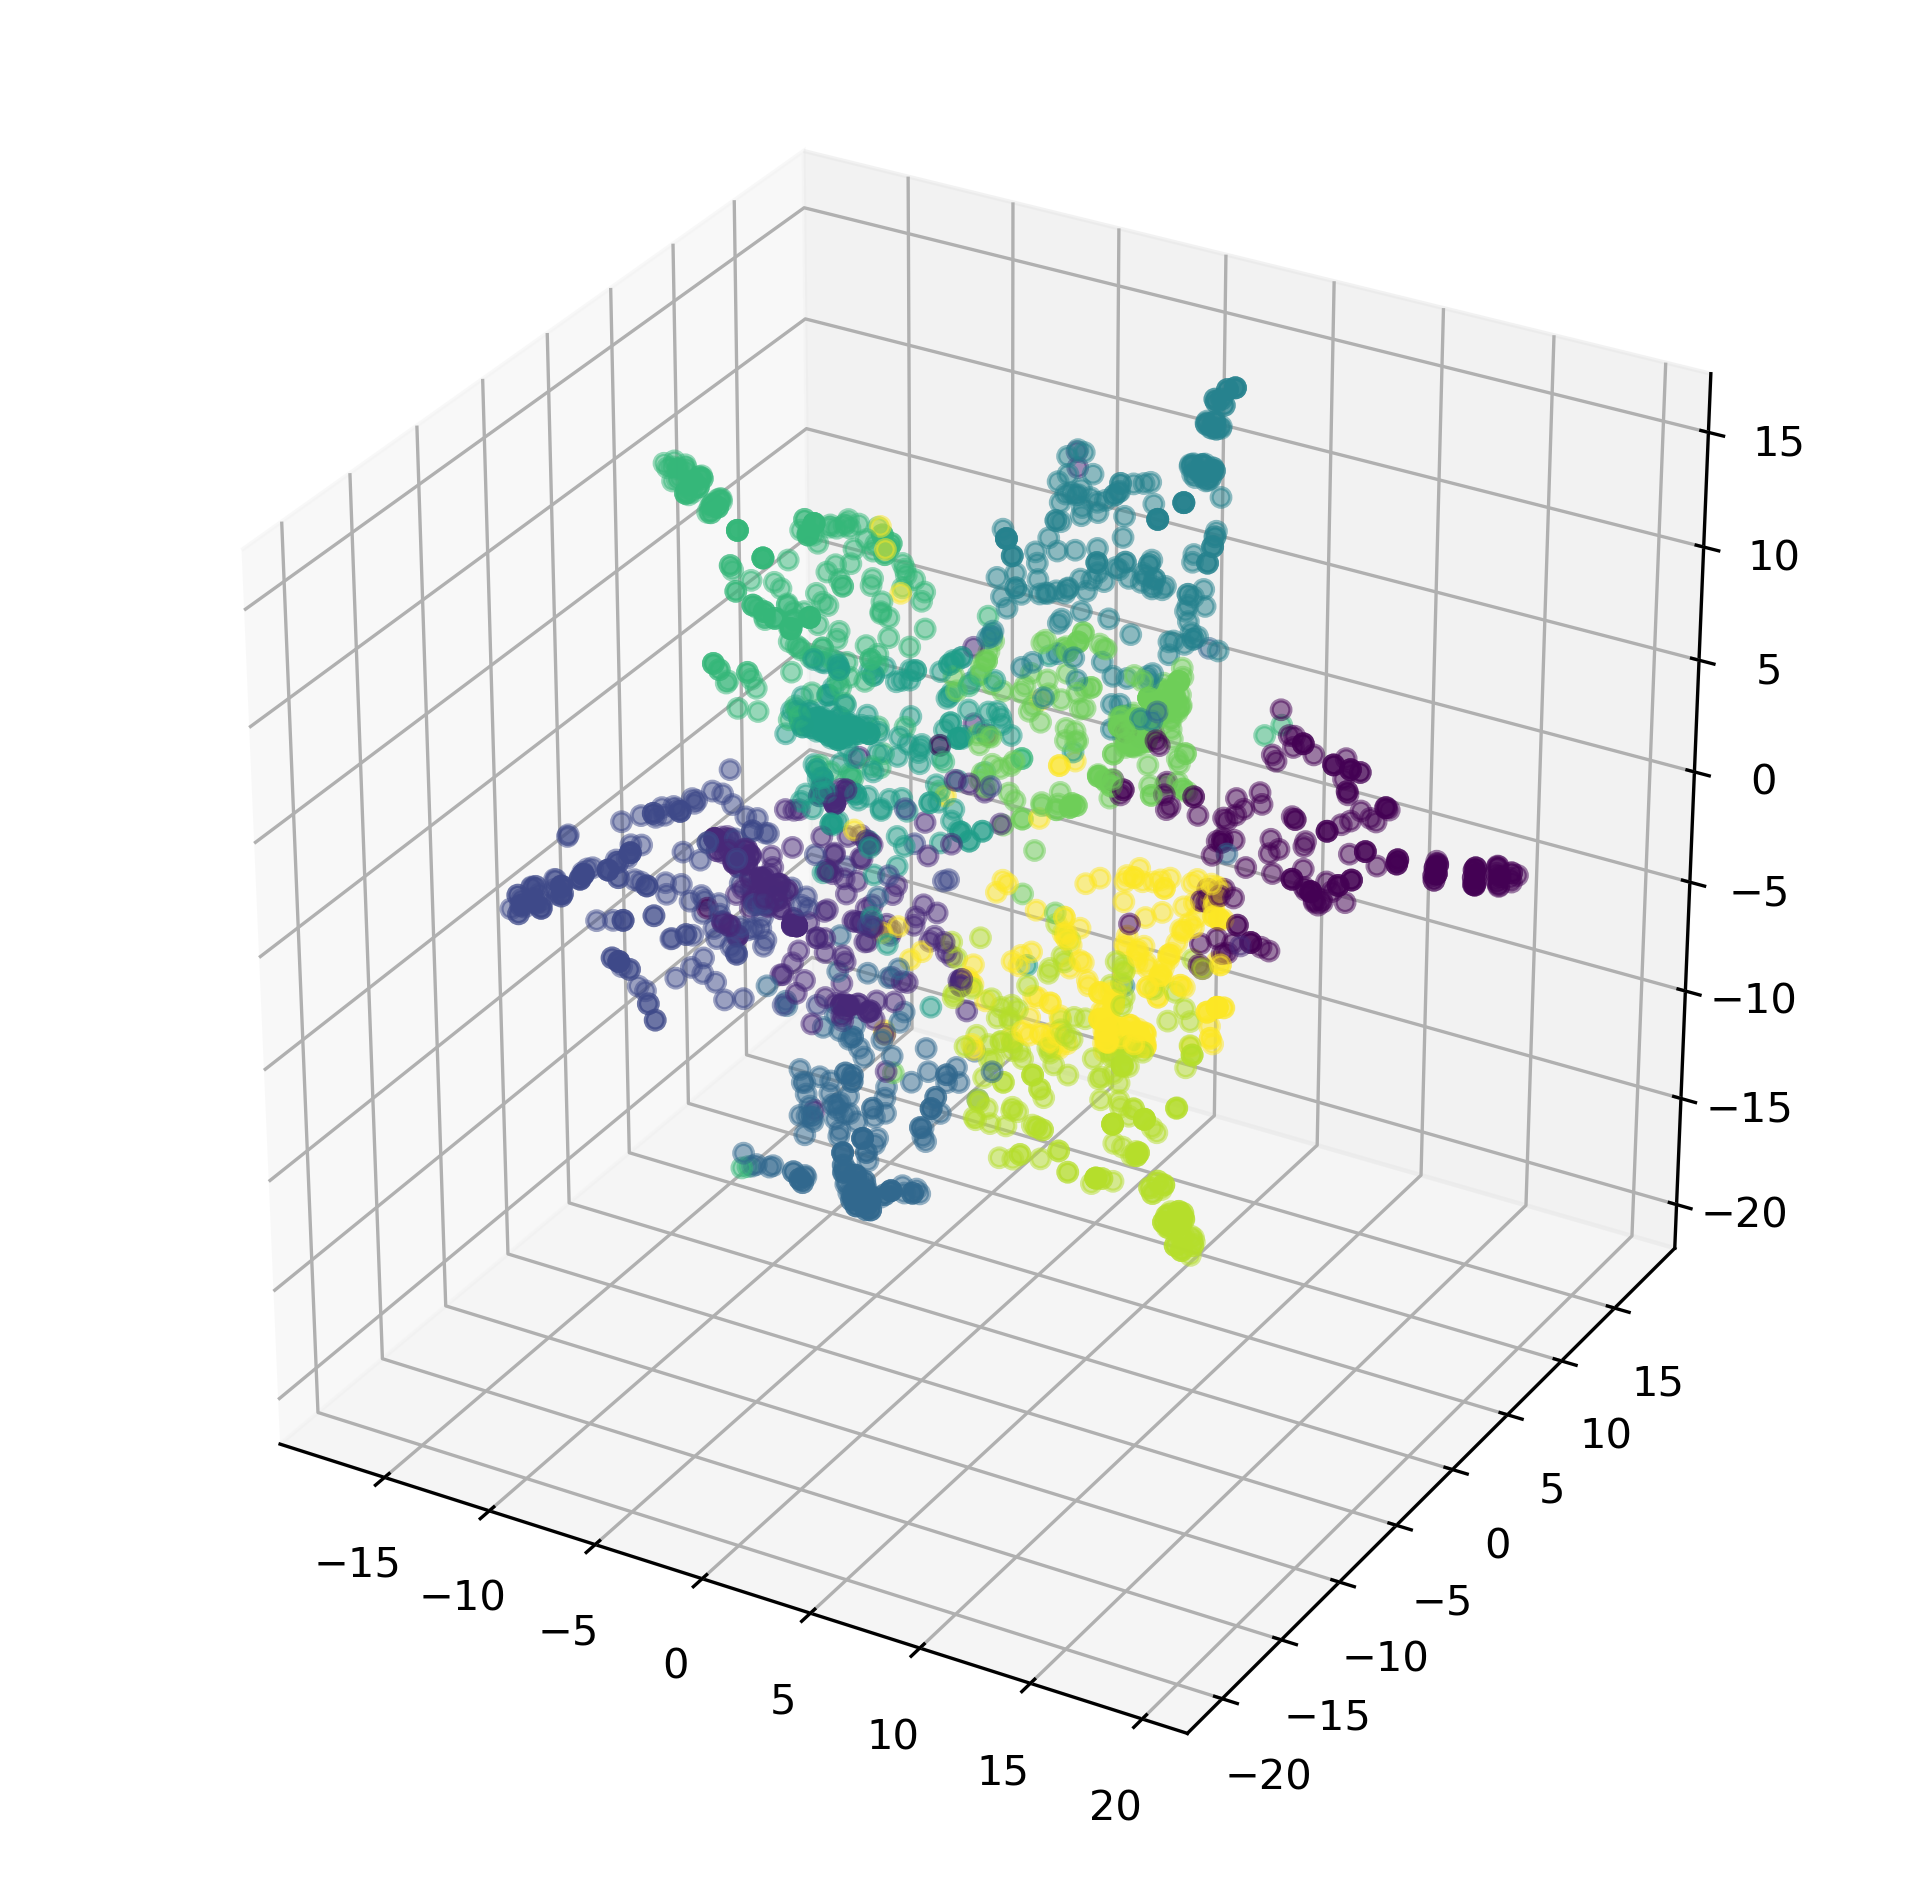

'\nplot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)\nplot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])\n\nfor t in range(n_topics):\n    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], \n                  text_color=colormap[t])\n    plot.add_layout(label)\n\nshow(plot)\n'

In [37]:
#from bokeh.plotting import figure, output_file, show
#from bokeh.models import Label
#from bokeh.io import output_notebook
from mpl_toolkits.mplot3d import Axes3D


plt.figure(figsize=(8, 8), dpi=300) 
ax = plt.subplot(111, projection='3d')
ax.scatter(tsne_lda_vectors[1:2000,0], tsne_lda_vectors[1:2000,1], tsne_lda_vectors[1:2000,2], c=lda_keys[1:2000], alpha = 0.5)
plt.show()



'''
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text_color=colormap[t])
    plot.add_layout(label)

show(plot)
'''